In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# read dataset
data = pd.read_excel("watermelon3.0Alpha.xlsx")
data.columns = ['density','sugarContent','isGood']
data.head(5)

,density,sugarContent,isGood
0,0.697,0.460,1
1,0.774,0.376,1
2,0.634,0.264,1
3,0.608,0.318,1
4,0.556,0.215,1


# 3.3 对率回归

In [3]:
def sigmoid(x):
    y =1.0 / ( 1 + np.exp(-x))
    return y

In [4]:
#梯度上升算法
def grad(train_X,labels,iters = 2000,lr = 0.05):
    m,n = train_X.shape
    
    # init weight
    weights = np.ones((n,1))

    for k in range(iters):
        # updata
        P = sigmoid(train_X.dot(weights))
        error = labels - P
        weights += lr * np.dot(train_X.T,error)

    return weights

In [5]:
data["b"] = 1.0
data.head(5)

,density,sugarContent,isGood,b
0,0.697,0.460,1,1.0
1,0.774,0.376,1,1.0
2,0.634,0.264,1,1.0
3,0.608,0.318,1,1.0
4,0.556,0.215,1,1.0


In [6]:
# create X and label
train_x = np.mat(data[["b","density","sugarContent"]])
labels = np.mat(data[['isGood']])

In [7]:
# grad slove weight
weight = grad(train_x,labels)
weight

array([[-4.08559863],
       [ 2.90970633],
       [11.50219396]])

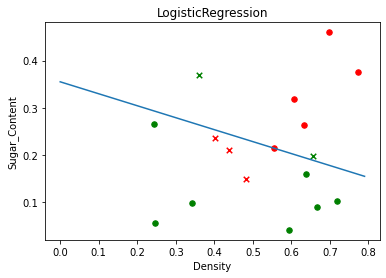

In [8]:
# plt
x1,y1 = [],[]
x2,y2 = [],[]
x3,y3 = [],[]
x4,y4 = [],[]

for k in range(train_x.shape[0]):
    if labels[k] == 1:
        if sigmoid(np.dot(train_x[k,:],weight)) >= 0.5 :
            x1.append(train_x[k,1])
            y1.append(train_x[k,2])
        else:
            x2.append(train_x[k,1])
            y2.append(train_x[k,2]) 
    else:  
        if sigmoid(np.dot(train_x[k,:],weight)) < 0.5 :
            x3.append(train_x[k,1])
            y3.append(train_x[k,2])
        else:
            x4.append(train_x[k,1])
            y4.append(train_x[k,2])
            
plt.scatter(x1,y1,s=30,c='red')
plt.scatter(x2,y2,s=30,c='red',marker='x')
plt.scatter(x3,y3,s=30,c='green')
plt.scatter(x4,y4,s=30,c='green',marker='x')

#draw line w0 + w1x1 +w2x2 = 0
X = np.arange(0,0.8,0.01)
Y = -(weight[0] + weight[1] * X)/weight[2]


plt.plot(X,Y)

plt.xlabel('Density')
plt.ylabel('Sugar_Content')
plt.title("LogisticRegression")
plt.savefig("imgs/h2_3.3.jpg",dpi = 800)
plt.show()